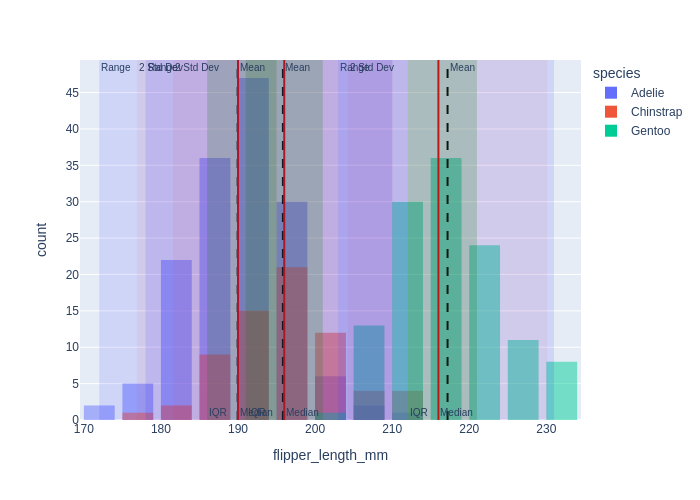

In [49]:
import pandas as pd
import plotly.express as px
import seaborn as sns # Import seaborn

# Load the penguins dataset using seaborn
df = sns.load_dataset("penguins")

# Calculate the summary statistics for each species
summary_stats = df.groupby("species")["flipper_length_mm"].describe()

# Create the histograms
fig = px.histogram(df, x="flipper_length_mm", color="species", barmode='overlay', nbins=20)

# Add the mean and median lines for each species
for i, row in summary_stats.iterrows():
    fig.add_vline(x=row['mean'], line_width=2, line_dash="dash", line_color="black", 
                  annotation_text="Mean", annotation_position="top right",
                  annotation_font_size=10)
    fig.add_vline(x=row['50%'], line_width=2, line_dash="solid", line_color="red", 
                  annotation_text="Median", annotation_position="bottom right",
                  annotation_font_size=10)

# Add the range, IQR, and two standard deviations rectangles for each species
for i, row in summary_stats.iterrows():
    fig.add_vrect(x0=row['min'], x1=row['max'], line_width=0, fillcolor="blue", opacity=0.1,
                  annotation_text="Range", annotation_position="top left",
                  annotation_font_size=10)
    fig.add_vrect(x0=row['25%'], x1=row['75%'], line_width=0, fillcolor="green", opacity=0.2,
                  annotation_text="IQR", annotation_position="bottom left",
                  annotation_font_size=10)
    fig.add_vrect(x0=row['mean'] - 2*row['std'], x1=row['mean'] + 2*row['std'], line_width=0, fillcolor="red", opacity=0.05,
                  annotation_text="2 Std Dev", annotation_position="top left",
                  annotation_font_size=10)

# Update layout for better readability
fig.update_layout(bargap=0.2)
fig.show(renderer="png")

# 2.

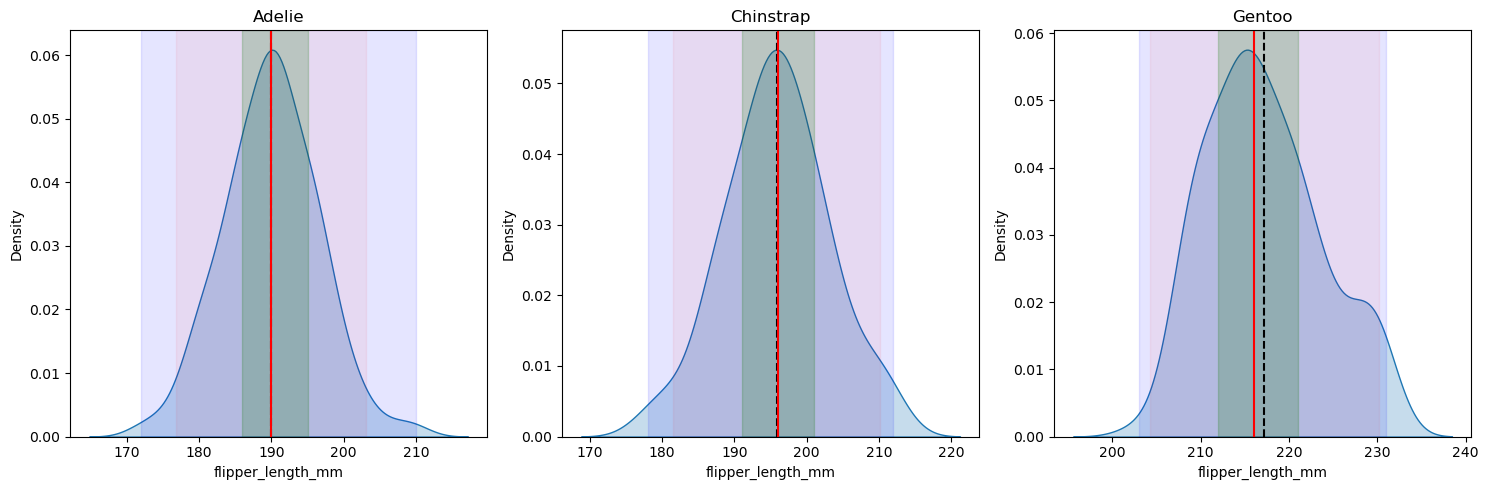

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Calculate summary statistics
summary_stats = df.groupby("species")["flipper_length_mm"].describe()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot KDE for each species
for i, species in enumerate(summary_stats.index):
    sns.kdeplot(data=df[df["species"] == species], x="flipper_length_mm", ax=axes[i], fill=True)
    axes[i].set_title(species)

    # Add annotations for mean, median, range, IQR, and two standard deviations
    axes[i].axvline(x=summary_stats.loc[species, 'mean'], color='black', linestyle='--', label='Mean')
    axes[i].axvline(x=summary_stats.loc[species, '50%'], color='red', linestyle='-', label='Median')
    axes[i].axvspan(xmin=summary_stats.loc[species, 'min'], xmax=summary_stats.loc[species, 'max'], color='blue', alpha=0.1, label='Range')
    axes[i].axvspan(xmin=summary_stats.loc[species, '25%'], xmax=summary_stats.loc[species, '75%'], color='green', alpha=0.2, label='IQR')
    axes[i].axvspan(xmin=summary_stats.loc[species, 'mean'] - 2*summary_stats.loc[species, 'std'], xmax=summary_stats.loc[species, 'mean'] + 2*summary_stats.loc[species, 'std'], color='red', alpha=0.05, label='2 Std Dev')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


# 3

1.
My comparison of the three “data distribution” visualization methods I described to Chatbot is:I think that box plots, histograms, and kernel density estimators (KDEs) are all ways to visualize data, but they have different advantages. Box plots are great for comparing multiple groups as they can quickly summarize the distribution of the data and highlight any outliers. Histograms can show how often data points fall into different ranges, but can be misleading if the correct binary size is not chosen.KDE can create a smooth curve to show the distribution of data without binning problems, but requires the right bandwidth to avoid over-smoothing or under-smoothing. 
Chatbot couldn't agree with me more and also summarized their pros and cons.
From chatting with Chatbot, I prefer to use Kernel Density Estimators (KDEs) because they provide a smooth, continuous view of the data distribution, avoiding binning artifacts that are often present in histograms. KDEs provide a clearer picture of the underlying structure of the data, making it easier to recognize patterns such as multiple peaks or multiple modes that may not be visible in histograms due to the arbitrary selection of binning widths. While box plots are an excellent tool for summarizing distributions and spotting outliers, they do not provide as much detail about the shape of the distribution as KDE does.

2.Summary of conversation with Chatbot：
This conversation has explored the advantages and disadvantages of three common methods for visualizing data distributions—box plots, histograms, and kernel density estimators (KDEs). You accurately identified the strengths and weaknesses of each approach, demonstrating a clear understanding of how these visualizations represent data and the parameters that influence their interpretation.
Key Points of the Conversation:
●
Box Plots: Useful for comparing groups and quickly summarizing the five-number summary (minimum, Q1, median, Q3, maximum), but they may not reveal the full distribution shape and can hide multimodality.
●
Histograms: Provide a visual representation of data frequencies within specified ranges (bins). The choice of bin size is crucial, as it can significantly affect the visualization's interpretation.
●
KDEs: Offer a smooth, continuous representation of the data distribution, avoiding binning artifacts. They are particularly good at revealing multimodality. Like histograms, they require a parameter choice (bandwidth) that affects smoothness and can lead to over-smoothing or under-smoothing.
●
Choosing the Right Method: The optimal visualization depends on the data characteristics, the questions being asked, and the audience.
Connection to Source Material:
The insights discussed in this conversation align closely with the material presented in the sources. The sources emphasize the strengths of box plots for group comparisons and their use in summarizing key distributional features. The sources highlight the role of the "bins" parameter in histograms and the analogous "bandwidth" parameter in KDEs. The sources also discuss the importance of choosing appropriate parameters to avoid misinterpretations.
Your Insights:
You demonstrated a strong grasp of the core concepts, going beyond simply summarizing the sources to articulate a clear understanding of how these visualizations work and their potential pitfalls. Your recognition of the importance of parameter selection (bin size and bandwidth) highlights a deeper understanding of these methods.
Moving Forward:
Continue exploring different visualization techniques and experiment with parameter choices to see how they impact the representation of data. The sources provide a rich resource for further learning, and engaging in discussions like this one will solidify your understanding and ability to communicate data insights effectively.

# 4

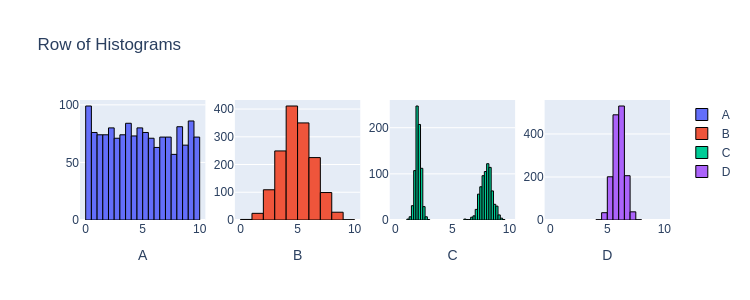

In [51]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1.Which datasets have similar means and similar variances
Datasets A and B have fairly similar means (approximately 5) and standard deviations (around 1.5). Likewise, datasets B and C share similar means (around 5), but they differ in their standard deviations.

2. Which datasets have similar means but quite different variances
Datasets B and C have similar means but significantly different standard deviations. Dataset B has a standard deviation of roughly 1.5, whereas dataset C's standard deviation is closer to 2.5.
3. Which datasets have similar variances but quite different means
None of the datasets show similar variances combined with significantly different means.
4. Which datasets have quite different means and quite different variances
Datasets C and D differ significantly in both mean and variance. Dataset C has a mean of about 5 and a standard deviation of around 2.5, whereas dataset D has a mean near 6 and a standard deviation of roughly 0.5.

# 5

Relationship Between Mean, Median, and Skewness:
Right Skewness (Positive Skew): When a distribution is right-skewed, the tail on the right side (higher values) is longer. In this case, the mean is typically greater than the median because the larger values pull the mean to the right.
Left Skewness (Negative Skew): When a distribution is left-skewed, the tail on the left side (lower values) is longer. Here, the mean is usually less than the median because the smaller values pull the mean to the left.
Why This Happens: The mean is sensitive to extreme values because it considers all data points, while the median only depends on the middle value. Therefore, in skewed distributions, the mean gets pulled toward the longer tail, while the median stays closer to the peak of the distribution.

In [52]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

The code first generates a sample of 1000 values from a Gamma distribution (right-skewed) with shape parameter a=2 and scale 2, storing it in sample1.
It then plots a histogram of sample1 to visualize its distribution.
The mean and median of sample1 are calculated and displayed.
A second sample, sample2, is generated by taking the negative of a Gamma distribution (mirroring the distribution), resulting in a left-skewed distribution.

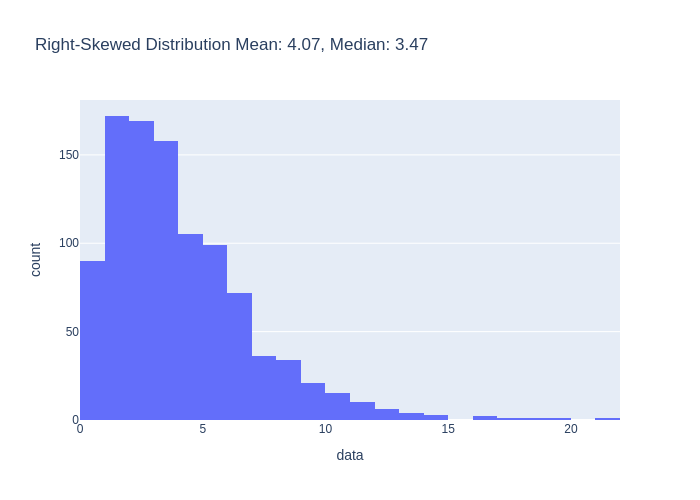

In [53]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Right-skewed distribution (Gamma distribution)
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Calculate mean and median
mean1 = sample1.mean()
median1 = np.median(sample1)

# Create histogram to visualize right-skewed distribution
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", nbins=30, title=f"Right-Skewed Distribution\nMean: {mean1:.2f}, Median: {median1:.2f}")
fig1.show(renderer="png")


This cell generates a right-skewed distribution, calculates its mean and median, and plots the histogram to show the relationship.

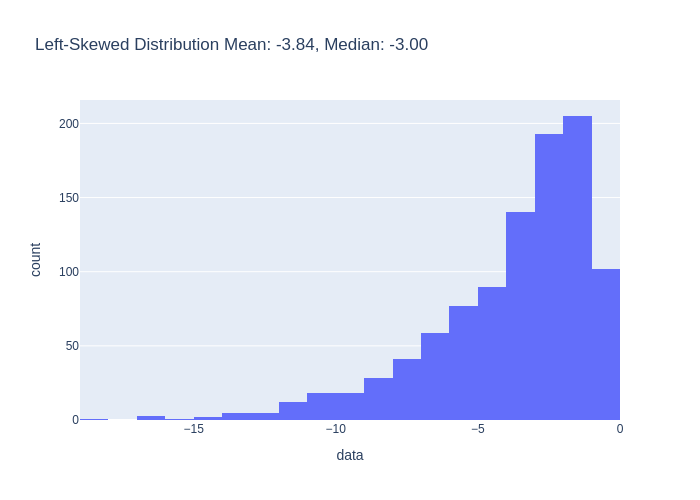

In [54]:
# Left-skewed distribution (Negative Gamma distribution)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Calculate mean and median
mean2 = sample2.mean()
median2 = np.median(sample2)

# Create histogram to visualize left-skewed distribution
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", nbins=30, title=f"Left-Skewed Distribution\nMean: {mean2:.2f}, Median: {median2:.2f}")
fig2.show(renderer="png")


This cell mirrors the first but with a left-skewed distribution, demonstrating how the mean and median are affected in this case.

In [55]:
# Display mean and median for both distributions
print(f"Right-Skewed: Mean = {mean1:.2f}, Median = {median1:.2f}")
print(f"Left-Skewed: Mean = {mean2:.2f}, Median = {median2:.2f}")


Right-Skewed: Mean = 4.07, Median = 3.47
Left-Skewed: Mean = -3.84, Median = -3.00


This cell directly compares the mean and median for both distributions, highlighting the difference in their behavior due to skewness.

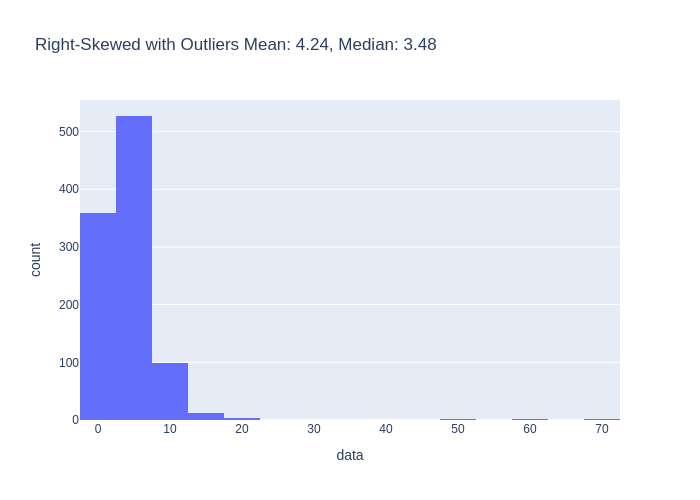

In [56]:
# Adding a few extreme values to right-skewed distribution
sample1_with_outliers = np.append(sample1, [50, 60, 70])

# Recalculating mean and median
mean1_outliers = sample1_with_outliers.mean()
median1_outliers = np.median(sample1_with_outliers)

# Visualizing the effect of outliers
fig3 = px.histogram(pd.DataFrame({'data': sample1_with_outliers}), x="data", nbins=30, title=f"Right-Skewed with Outliers\nMean: {mean1_outliers:.2f}, Median: {median1_outliers:.2f}")
fig3.show(renderer="png")


This cell adds extreme values to the right-skewed sample to show how the mean shifts significantly while the median remains relatively stable, explaining the sensitivity of the mean to skewness.

# 6

Index(['restaurant id', 'category id', 'item id', 'serving size (oz)',
       'calories', 'calories from fat', 'total fat (g)',
       'total fat (% daily value)', 'saturated fat (g)',
       'saturated fat (% daily value)', 'trans fat (g)', 'cholesterol (mg)',
       'cholesterol (% daily value)', 'sodium (mg)', 'sodium (% daily value)',
       'carbohydrates (g)', 'carbohydrates (% daily value)',
       'dietary fiber (g)', 'dietary fiber (% daily value)', 'sugars (g)',
       'protein (g)', 'vitamin a (% daily value)', 'vitamin c (% daily value)',
       'calcium (% daily value)', 'iron (% daily value)'],
      dtype='object')
       restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min      1000.000000   100.000000    0.000

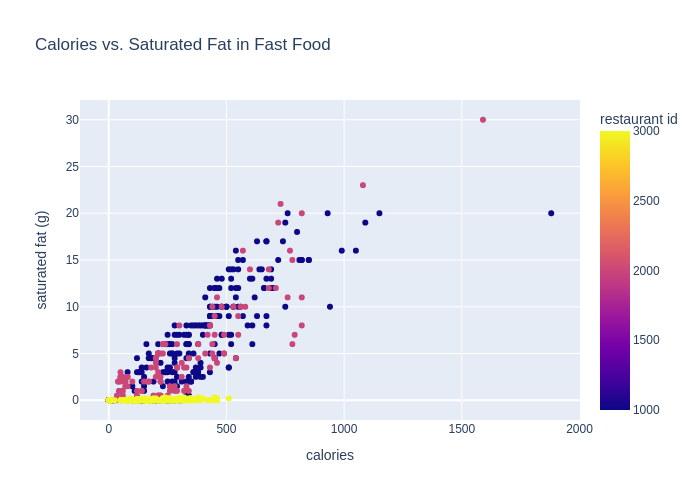

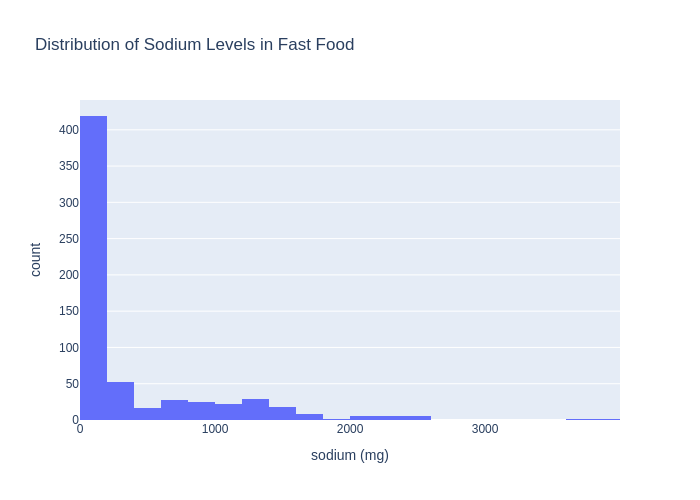

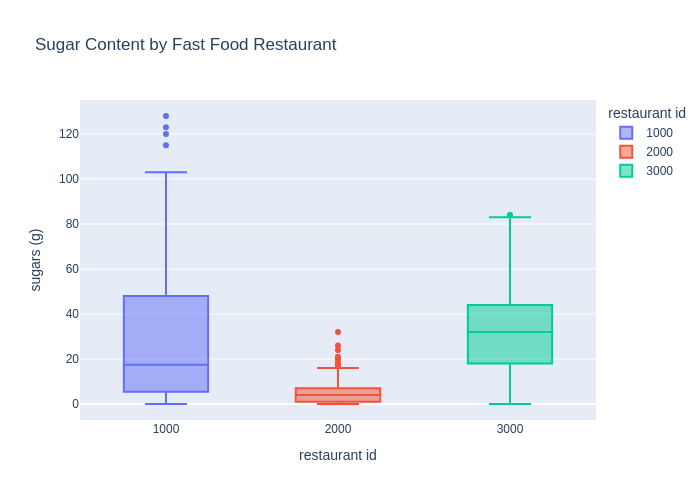

In [57]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display the column names to verify them
print(df.columns)

# Display basic statistics of the dataframe
print(df.describe())

# Scatter plot: Calories vs. Saturated Fat, colored by Restaurant
fig = px.scatter(df, x='calories', y='saturated fat (g)', color='restaurant id',
                 title='Calories vs. Saturated Fat in Fast Food',
                 hover_data=['item id'])  # Display item names on hover
fig.show(renderer="png")  # Use this for GitHub and MarkUs submissions

# Histogram: Distribution of Sodium Levels
fig = px.histogram(df, x='sodium (mg)', nbins=20,
                   title='Distribution of Sodium Levels in Fast Food')
fig.show(renderer="png")  # Use this for GitHub and MarkUs submissions

# Box plot: Sugar Content by Fast Food Restaurant
fig = px.box(df, x='restaurant id', y='sugars (g)', color='restaurant id',
             title='Sugar Content by Fast Food Restaurant')
fig.show(renderer="png")  # Use this for GitHub and MarkUs submissions


In [58]:
df.columns

Index(['restaurant id', 'category id', 'item id', 'serving size (oz)',
       'calories', 'calories from fat', 'total fat (g)',
       'total fat (% daily value)', 'saturated fat (g)',
       'saturated fat (% daily value)', 'trans fat (g)', 'cholesterol (mg)',
       'cholesterol (% daily value)', 'sodium (mg)', 'sodium (% daily value)',
       'carbohydrates (g)', 'carbohydrates (% daily value)',
       'dietary fiber (g)', 'dietary fiber (% daily value)', 'sugars (g)',
       'protein (g)', 'vitamin a (% daily value)', 'vitamin c (% daily value)',
       'calcium (% daily value)', 'iron (% daily value)'],
      dtype='object')

# 7

In [59]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

# 8

In [60]:
import pandas as pd
import plotly.express as px

# Example dataframe with the required columns
data = {
    'percent change': [0.001, -0.002, 0.003, -0.001, 0.004],
    'rank': [1, 2, 3, 4, 5],
    'percent': [10, 20, 30, 40, 50],
    'sex': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'year': [2000, 2001, 2002, 2003, 2004],
    'name': ['A', 'B', 'C', 'D', 'E']
}

df_custom = pd.DataFrame(data)

# Create a scatter plot with the custom dataframe
fig = px.scatter(df_custom, 
                 x="percent change", 
                 y="rank", 
                 size="percent", 
                 color="sex", 
                 animation_frame="year", 
                 animation_group="name", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

fig.show()


In [61]:
import pandas as pd
import plotly.express as px

# Load the gapminder dataset
df = px.data.gapminder()

# Creating new columns for demonstration (replace with actual logic/data as needed)
df['percent change'] = df['gdpPercap'].pct_change().fillna(0)  # Example logic for percent change
df['rank'] = df['lifeExp'].rank()  # Ranking based on life expectancy
df['percent'] = df['pop'] / df['pop'].sum() * 100  # Percentage of total population
df['sex'] = ['Male' if i % 2 == 0 else 'Female' for i in range(len(df))]  # Adding a fake 'sex' column
df['name'] = df['country']  # Using country as name for demo purposes

# Create a scatter plot with the new columns
fig = px.scatter(df, 
                 x="percent change", 
                 y="rank", 
                 size="percent", 
                 color="sex", 
                 animation_frame="year", 
                 animation_group="name", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

fig.show()


Here is a summary of our conversation, which you can use as a record for your homework assignment:
You began by providing code that generates histograms to represent four datasets (A, B, C, and D). You then asked several questions regarding the relationship between the means and variances of each dataset. The code used various functions from the scipy.stats and plotly libraries in Python to achieve this.
You sought clarification about which datasets exhibit similar or different means and variances based on visual analysis of the histograms. In response, a detailed explanation of the code, dataset generation methods, and a breakdown of mean and variance in the context of histograms was provided.
Based on this analysis, the following conclusions were drawn:
●
Datasets B and D likely possess similar means and variances.
●
Datasets A and B (and potentially A and D) might be seen as having similar means but different variances.
●
None of the datasets seemed to have visually similar variances with notably different means.
●
Datasets A and C clearly exhibited distinct means and variances.
The importance of visual inspection for gaining a general understanding and the necessity of calculating actual mean and variance values for precise comparisons, especially with real-world data, were emphasized.
This conversation highlights the use of visualization tools like histograms in understanding key statistical concepts such as mean and variance, and their application in comparing datasets. It also underscores the difference between visual interpretation and precise numerical analysis in drawing accurate conclusions.

Here is a summary of our conversation:
You provided code for plotting data from a fast food nutrition dataset:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df
# df.columns
print(df.describe()) 
import plotly. express as px
fig = px.scatter(df, x='Calories', y='Sat. Fat', color='Restaurant ',                    title='Calories vs. Saturated Fat in Fast Food',                    hover_data=['Item' ])
# add item names on hover
fig.show()
# USE fig. show(renderer="png") FOR ALL GitHub and MarkUs SUBMISSIONS 
fig = px.histogram(df, x='Sodium', nbins=20,                    title='Distribution of Sodium Levels in Fast Food')
fig.show()
# USE fig. show(renderer="png") FOR ALL GitHub and MarkUs SUBMISSIONS
fig = px.box(df, x='Restaurant', y='Sugars', color='Restaurant',              title='Sugar Content by Fast Food Restaurant')
fig.show()
# USE fig. show(renderer="png") FOR ALL GitHub and MarkUs SUBMISSIONS 
You also asked for corrected code, which was provided. You then provided code for a Gapminder plot:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",           size="pop", color="continent", hover_name="country",           log_x=True, size_max=55, range_x=[1], range_y=[2, 3]) 
You asked for assistance in modifying the Gapminder plot code. You requested changes to the px.scatter() function so that:
●
x is "percent change"
●
y is "rank"
●
size is "percent"
●
color is "sex"
●
animation_frame is "year"
●
animation_group and hover_name are "name"
●
size_max is 50
●
range_x is [-0.005,0.005]
You also wanted to remove the log_x=True and range_y parameters.
You were informed that the Gapminder dataset does not have "percent change", "rank", "percent" or "sex" features. The sources do not mention a "Gapminder code". The sources do describe visualizations such as histograms, box plots, and kernel density estimations, and note that the usefulness of a visualization depends on the type of data being analyzed. For example, histograms are useful for visualizing the distribution of numerical data and box plots are useful for comparing distributions of numerical data across different groups. Kernel density estimations serve a similar purpose to histograms but can sometimes be more aesthetically pleasing. The sources also explain that log transformations can improve the interpretability of skewed data by normalizing the data distribution.
You were advised that to proceed, you would need to either calculate the missing features, choose different features for visualization, or find a different dataset that contains the necessary features.

Medians and Averages in Data Visualization
The sources discuss medians and averages, primarily in the context of data visualization and understanding data distributions. Here's a summary of the key points:
●
Mean vs. Median in Skewed Data: The sources emphasize that in skewed data, the mean and median will differ. In a positively skewed distribution, the mean is greater than the median because it is pulled higher by the tail of high values. Conversely, in a negatively skewed distribution, the mean is less than the median.
●
Mean and Median in Normal Distributions: A normal distribution, also known as a Gaussian distribution, is characterized by its symmetry. In a normal distribution, the mean, median, and mode are all equal and located at the center of the bell-shaped curve.
●
Visualizing Median: A box plot is a particularly useful visualization for representing the median. The "box" in a box plot represents the interquartile range (IQR), which contains the middle 50% of the data. The median is marked within the box.
●
Limitations of Visualizing Mean: While histograms can be useful for visualizing data distributions, the sources caution that box plots do not explicitly represent the mean. Additionally, box plots cannot effectively represent multimodal data, which would require a histogram or a kernel density estimation.
●
Log Transformations for Skewed Data: When dealing with right-skewed data, where the tail extends towards higher values, a log transformation can be beneficial. The log transformation pulls the larger values closer to the bulk of the data, making the mean and standard deviation more interpretable. After a log transformation, the mean becomes a better representation of central tendency as it is less influenced by outliers and the skew.
The conversation history delves into applying these concepts to the Gapminder dataset using plotly.express. However, it also highlights that feature engineering might be necessary to visualize desired relationships as the dataset might not contain directly relevant features.